# Lab 4 Report
Author's names: Charlie Fisher, Zhenghao Guo

In [31]:
# Import Cell
import numpy as np
#import simpleaudio as sa
from scipy.io import wavfile as wav
import scipy
import decimal
import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
from scipy import signal as sig
import csv

## Summary
The purpose of this lab is to gain more understanding of convolution, signals, and to find similarities between two signals. We use a decode code in order to identify correct signals. In this lab, we are introduced to for-loops and reading CSV files. 

## Assignment 1 -- Matched Filter with Ideal Signals

<IPython.core.display.Javascript object>


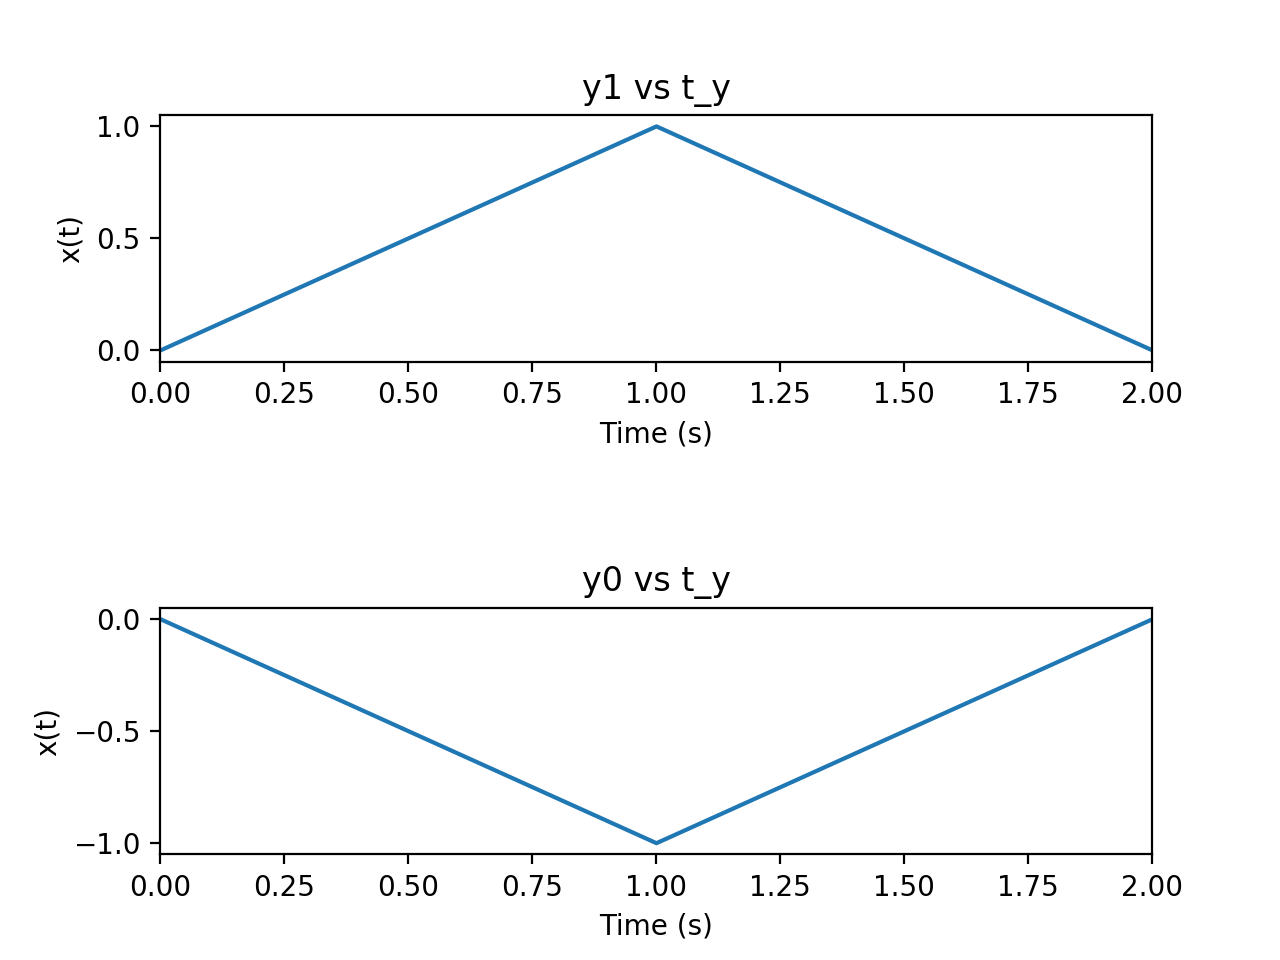

y1_corr = 0.999
y2_corr = -0.999


In [32]:
# Assignment 1 -- Matched Filter with Ideal Signals

# Part A
def u(t):
    return 1.0 * (t > 0) 
fs = 1000
t = np.arange(0, 2.0001, 1 / fs)
s1 = u(t) - u(t - 1)
s0 = -s1

# Part B
y1 = np.convolve(s1, s1) / fs 
y0 = np.convolve(s1, s0) / fs

# Part C
t_y = np.arange(0, len(y1), 1) / fs
fig1 = plt.figure(1)
fig1.subplots_adjust(hspace=1, wspace=1)

plt.subplot(2,1,1)
plt.plot(t_y, y1)
plt.ylabel('x(t)')
plt.xlabel('Time (s)')
plt.title('y1 vs t_y')
plt.xlim(0, 2)

plt.subplot(2,1,2)
plt.plot(t_y, y0)
plt.ylabel('x(t)')
plt.xlabel('Time (s)')
plt.title('y0 vs t_y')
plt.xlim(0, 2)

# Part D 
y1_corr = y1[int(1 * fs)] # I'm not sure if he just wants us to plug in 1 or what
y0_corr = y0[int(1 * fs)]
print("y1_corr = " + str(y1_corr))
print("y2_corr = " + str(y0_corr))

## Discussion

## Assignment 2 -- Signal Decoding with a Matched Filter

In [35]:
# Assignment 2 -- Signal Decoding with a Matched Filter

# Part A
def decode(r, fs, s0, s1):
    y1_t = np.convolve(r, s1) / fs
    y0_t = np.convolve(r, s0) / fs
    y1_corr = y1_t[1 * fs]
    y0_corr = y0_t[1 * fs]
    if (y1_corr > y0_corr):
        s = "1"
    else: 
        s = "0"
    return s

<IPython.core.display.Javascript object>


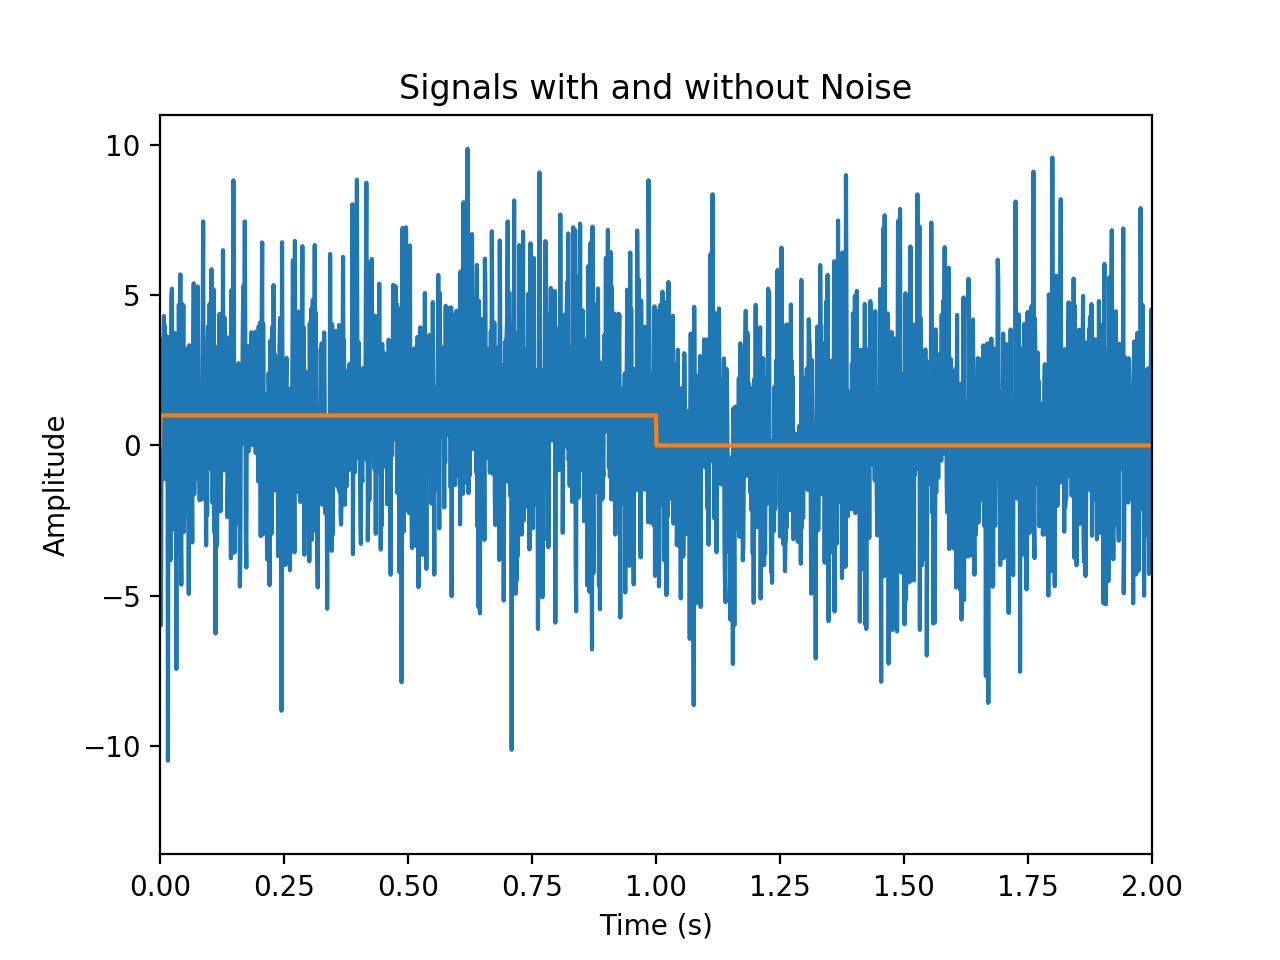

<IPython.core.display.Javascript object>


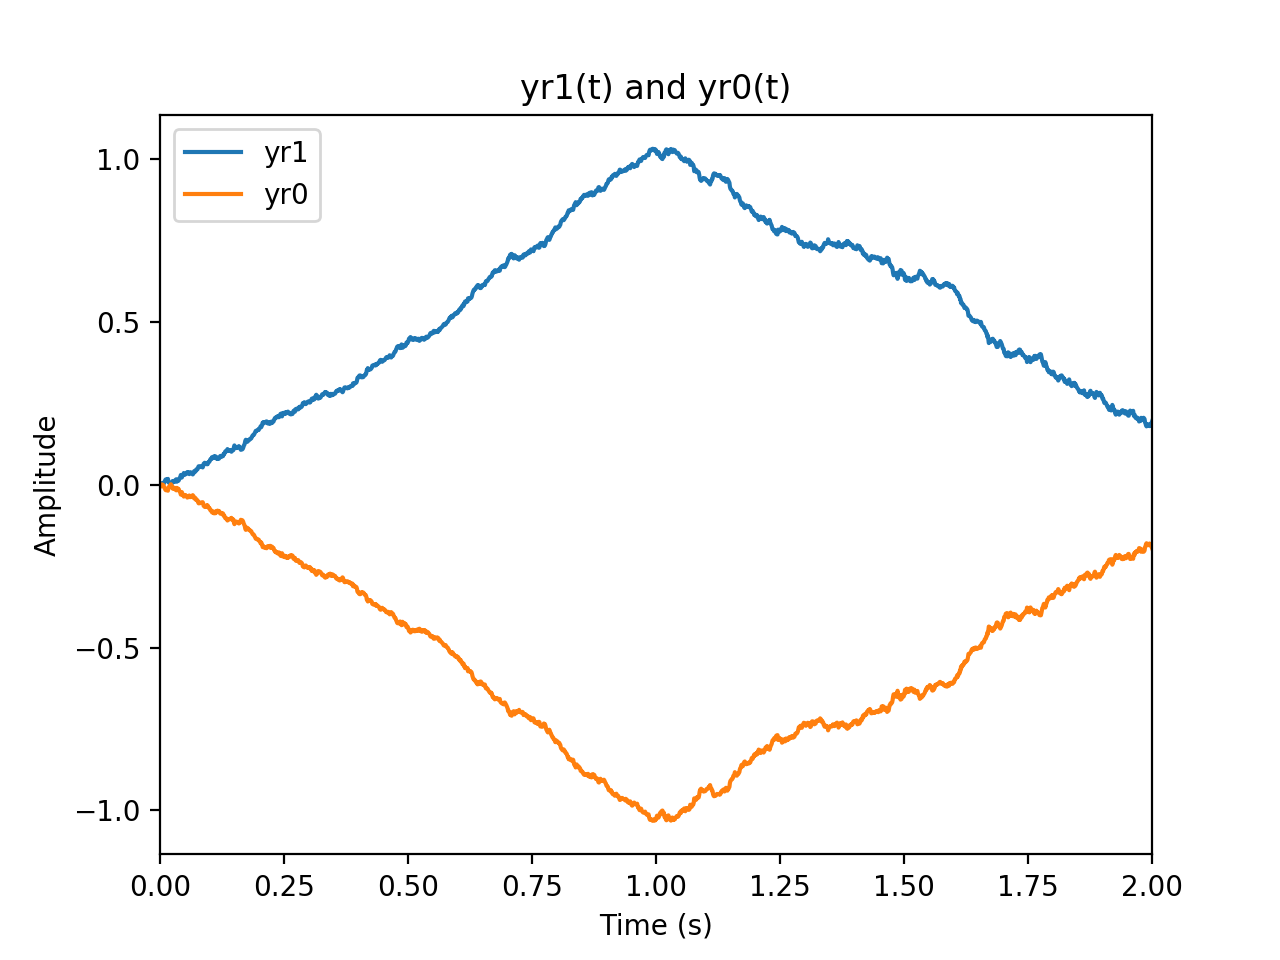

yr1_corr = 1.0
yr0_corr = -1.0
Passing in r function...
1
Passing in r0 function...
0


In [36]:
# Part B
n = np.random.normal(0, 3, len(s1))
r = s1 + n
r0 = s0 + n
s1_s0 = np.concatenate([s1, s0])
r_r0 = np.concatenate([r, r0])

ts = np.arange(0, len(s1_s0), 1) / fs
tr = np.arange(0, len(r_r0), 1) / fs
fig1 = plt.figure(2)

plt.plot(tr, r_r0)
plt.plot(ts, s1_s0)
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')
plt.title('Signals with and without Noise')
plt.xlim(0, 2)

# Part C
yr1 = np.convolve(r, s1) / fs
yr0 = np.convolve(r, s0) / fs

t_yr = np.arange(0, len(yr1), 1) * (1 / fs)

fig1 = plt.figure(3)

plt.plot(t_yr, yr1, label = 'yr1')
plt.plot(t_yr, yr0, label = 'yr0')
plt.legend(loc = 'upper left')
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')
plt.title('yr1(t) and yr0(t)')
plt.xlim(0, 2)

yr1_corr = y1[int(len(yr1) / 2)] * fs
yr0_corr = y0[int(len(yr0) / 2)] * fs
print("yr1_corr = " + str(yr1_corr))
print("yr0_corr = " + str(yr0_corr))

# Part D
print("Passing in r function...")
print(decode(r, fs, s0, s1))
print("Passing in r0 function...")
print(decode(r0, fs, s0, s1))


## Assignment 3 -- Decipher Received Message

In [28]:
# Assignment 3 -- Decipher Received Message

# Part A
fs = 8000
with open('receivedmsg.csv',) as readcsv:
    rm = csv.reader(readcsv, delimiter= ",", quoting=csv.QUOTE_NONNUMERIC)
    result = str("")
    
# Part B
    for row in rm:
        binary = decode(row, fs, s0, s1)
        result += binary
    print(result)


0100011101101111001000000100100001110101011100110110101101101001011001010111001100100001


## Discussion

The decoded message reads "Go Huskies!"